### Linear Regression:

**Y = wX + b**

Y --> Dependent Variable <br>
X --> Independent Variable<br>
w --> weight<br>
b --> bias<br>

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w  =  w - α*dw<br>
b  =  b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

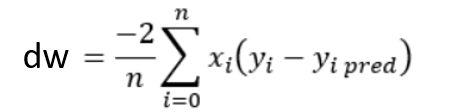

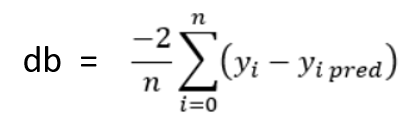

**Linear Regression**

In [7]:
import numpy as np

class Linear_Regression():

  # initiating the parameters (learning rate & no. of iterations)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y ):

    # number of training examples & number of features
    self.m, self.n = X.shape  # number of rows & columns

    # initiating the weight and bias 

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent
    
    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):
    Y_prediction = self.predict(self.X)

    # calculate gradients
    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    # upadating the weights
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db
 

  def predict(self, X):

    return X.dot(self.w) + self.b



In [8]:
# importing the dataset
import pandas as pd

df = pd.read_csv("../Datasets/salary_data.csv")
X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values

# print (X)
# print (Y)

In [9]:
# splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)
# print (X_train)
# print (X_test)

In [10]:
# fitting the model
regressor = Linear_Regression(learning_rate = 0.01, no_of_iterations = 1000)
regressor.fit(X_train, Y_train)

# predicting the test set results
Y_pred = regressor.predict(X_test)
Y_pred 

array([ 40594.69280831, 123305.17728585,  65031.88140395,  63152.09766582,
       115786.04233334, 108266.90738084, 116725.9342024 ,  64091.98953488,
        76310.5838327 , 100747.77242834])

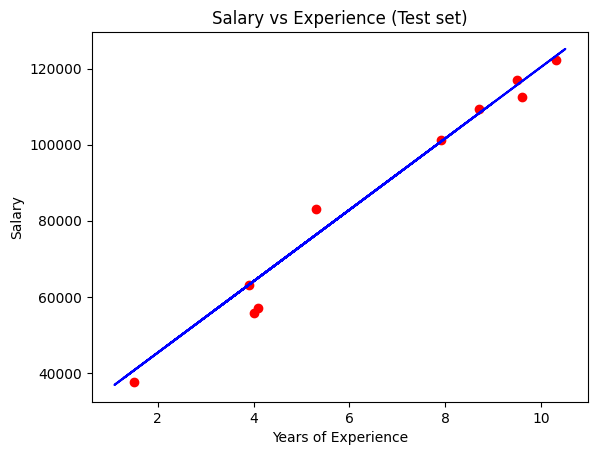

In [11]:
# visualizing the test set results
import matplotlib.pyplot as plt

plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()
